In [1]:
from sklearn.metrics import precision_recall_curve, average_precision_score, auc
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
def get_pr_scores(results_file):
    
    results_df = pd.read_csv(results_file, header=None)
    y_pred = results_df[0].values
    y_true = results_df[1].values
    
    precision, recall, thresholds = precision_recall_curve(y_true, y_pred)
    avg_score = average_precision_score(y_true, y_pred) 
    
    return avg_score, precision, recall, thresholds


def get_auprc(precision, recall):
    # x must be monotonically increasing or decreasing
    return auc(precision, recall)


def get_classwise_accuracy(results_file, threshold=0.5):
    df = pd.read_csv(results_file, header=None)
    pos_df = df.loc[df[1]==1]
    neg_df = df.loc[df[1]==0]
    pos_acc = len(pos_df.loc[pos_df[0]>threshold])/len(pos_df)
    neg_acc = len(neg_df.loc[neg_df[0]<=threshold])/len(neg_df)
    return pos_acc, neg_acc

In [28]:
# GLOBALS
PILOT=False
MODEL_NAME="adda"

if PILOT:
    suffix = "_pilot"
else:
    suffix = ""

TF="Hnf4a"

In [29]:
source_file = f"../../results/mm10/{TF}/{MODEL_NAME}{suffix}_src.csv.gz"
target_file = f"../../results/mm10/{TF}/{MODEL_NAME}{suffix}_tgt.csv.gz"
print(f"The source filepath is {source_file}\nThe target filepath is {target_file}")

The source filepath is ../../results/mm10/Hnf4a/adda_src.csv.gz
The target filepath is ../../results/mm10/Hnf4a/adda_tgt.csv.gz


In [30]:
source_metrics = get_pr_scores(source_file)

In [31]:
target_metrics = get_pr_scores(target_file)

In [32]:
# average precision
print(f"The average source precision score is {source_metrics[0]}\nThe average target precision score is {target_metrics[0]}")

The average source precision score is 0.24869157517248655
The average target precision score is 0.18025317882164935


In [33]:
# AUPRC
print(f"The area under the PR curve for source is {get_auprc(source_metrics[2], source_metrics[1])}\nThe area under the PR curve for target is {get_auprc(target_metrics[2], target_metrics[1])}")

The area under the PR curve for source is 0.24865050294552943
The area under the PR curve for target is 0.1802134058025764


The source PR Curve


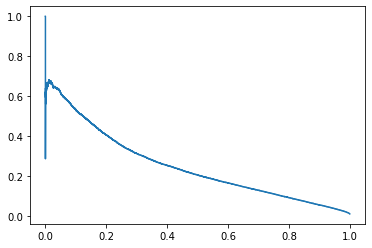

In [35]:
print("The source PR Curve")
plt.plot(source_metrics[2], source_metrics[1]); # xaxis recall, yaxis precision

The target PR Curve


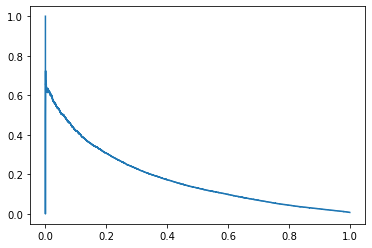

In [34]:
print("The target PR Curve")
plt.plot(target_metrics[2], target_metrics[1]); # xaxis recall, yaxis precision

In [11]:
df_src = pd.read_csv(source_file, header= None)

In [12]:
df_src

,0,1,2,3,4
0,0.021470,0,chr2,3050950,3051450
1,0.023311,0,chr2,3051000,3051500
2,0.026924,0,chr2,3051050,3051550
3,0.041101,0,chr2,3051100,3051600
4,0.043633,0,chr2,3051150,3051650
...,...,...,...,...,...
3164246,0.284861,0,chr2,182012150,182012650
3164247,0.520810,0,chr2,182012200,182012700
3164248,0.812996,0,chr2,182012250,182012750
3164249,0.553657,0,chr2,182012300,182012800


In [13]:
adda_src_file = source_file.replace("hybrid", "adda")

In [14]:
df_src_adda = pd.read_csv(adda_src_file, header=None)

In [15]:
df_src_adda

,0,1,2,3,4
0,0.011856,0,chr2,3050950,3051450
1,0.017189,0,chr2,3051000,3051500
2,0.017141,0,chr2,3051050,3051550
3,0.013075,0,chr2,3051100,3051600
4,0.015706,0,chr2,3051150,3051650
...,...,...,...,...,...
1353995,0.088723,0,chr2,78243350,78243850
1353996,0.007220,0,chr2,78243400,78243900
1353997,0.016033,0,chr2,78243450,78243950
1353998,0.103188,0,chr2,78243500,78244000


In [16]:
df_src.loc[~df_src[0].eq(df_src_adda[0])]

,0,1,2,3,4


In [17]:
df_src_adda.loc[~df_src[0].eq(df_src_adda[0])]

,0,1,2,3,4


In [18]:
df_src_adda.equals(df_src)

True

In [19]:
df_src[2].unique()

array(['chr2'], dtype=object)

In [20]:
len(df_src)

1354000

In [21]:
df = pd.read_csv(target_file, header=None)

In [22]:
len(df)

4339180

In [23]:
df.loc[df[1]==1]

,0,1,2,3,4
178,0.566600,1,chr2,20100,20600
179,0.848110,1,chr2,20150,20650
180,0.827761,1,chr2,20200,20700
181,0.928233,1,chr2,20250,20750
182,0.827783,1,chr2,20300,20800
...,...,...,...,...,...
4338853,0.969007,1,chr2,242080750,242081250
4338854,0.961633,1,chr2,242080800,242081300
4338855,0.952246,1,chr2,242080850,242081350
4338856,0.734283,1,chr2,242080900,242081400


In [24]:
df.loc[(df[1]==1)&(df[0]>0.1)]

,0,1,2,3,4
178,0.566600,1,chr2,20100,20600
179,0.848110,1,chr2,20150,20650
180,0.827761,1,chr2,20200,20700
181,0.928233,1,chr2,20250,20750
182,0.827783,1,chr2,20300,20800
...,...,...,...,...,...
4338853,0.969007,1,chr2,242080750,242081250
4338854,0.961633,1,chr2,242080800,242081300
4338855,0.952246,1,chr2,242080850,242081350
4338856,0.734283,1,chr2,242080900,242081400


In [25]:
df[2].unique()

array(['chr2'], dtype=object)

In [26]:
10%10

0